In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df_dup=df.duplicated().any() #CheckingForDuplicateValues
df_dup

False

<Axes: >

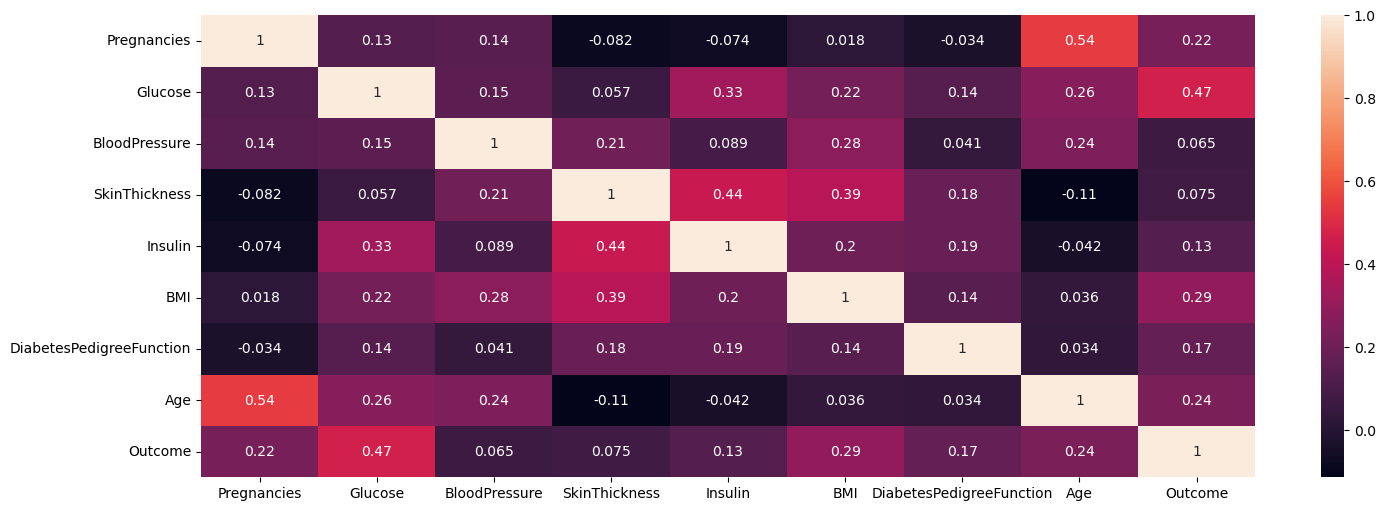

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)


In [6]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [7]:
cate_val

['Outcome']

In [8]:
cont_val

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
st=StandardScaler()

In [11]:
df[cont_val]= st.fit_transform(df[cont_val])

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [13]:
#Test Train Split
X=df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [14]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644
...,...,...,...,...,...,...,...,...
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
106,-0.844885,-0.779128,2.734528,-1.288212,-0.692891,-1.217483,-0.799958,-0.531023
270,1.827813,-0.622642,0.873409,1.032726,-0.692891,1.727044,2.005732,0.404942
435,-1.141852,0.629244,-3.572597,-1.288212,-0.692891,1.320902,-0.805998,-0.360847


In [18]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred1= log.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.7532467532467533

In [22]:
#Support Vector Classifier

from sklearn import svm

svm=svm.SVC()

svm.fit(X_train,y_train)

y_pred2=svm.predict(X_test)

accuracy_score(y_test,y_pred2)



0.7272727272727273

In [23]:
#KNeighbours Classifier

from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred3=knn.predict(X_test)

accuracy_score(y_test,y_pred3)

score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

score

knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7207792207792207

In [25]:
#Non-Linear ML Algorithms
data=pd.read_csv('diabetes.csv')

data.head()

data = data.drop_duplicates()

X=data.drop('Outcome',axis=1)

y=data['Outcome']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred4=dt.predict(X_test)

accuracy_score(y_test,y_pred4)

0.7597402597402597

In [26]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred5= rf.predict(X_test)

accuracy_score(y_test,y_pred5)

0.7467532467532467

In [27]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

gbc.fit(X_train,y_train)

y_pred6= gbc.predict(X_test)

accuracy_score(y_test,y_pred6)

0.7467532467532467

<Axes: xlabel='Models', ylabel='ACC'>

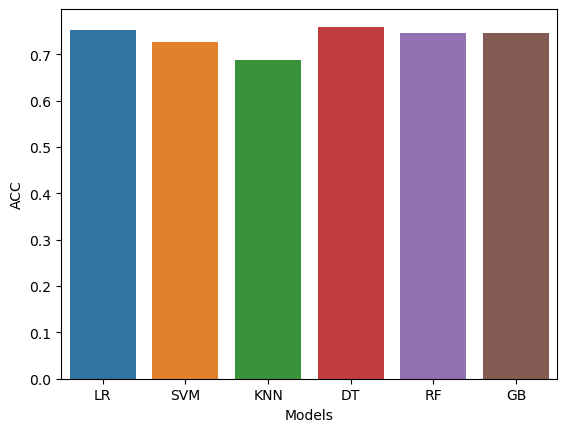

In [28]:
final_Data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                        accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),
                        accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

final_Data #ACC is stands for AccuracyScores

import seaborn as sns

sns.barplot(x='Models', y='ACC', data=final_Data)


In [30]:
X= data.drop('Outcome',axis=1)
y=data['Outcome']

X

dt= DecisionTreeClassifier()

dt.fit(X,y)

DecisionTreeClassifier()